In [33]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd

In [35]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

for row in session.query(Measurement, Measurement.date, Measurement.prcp).all():
    print(row)

(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E61AE10>, '2010-01-01', 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0BE8FE10>, '2010-01-02', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0DE0DB00>, '2010-01-03', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0B7F3128>, '2010-01-04', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771A20>, '2010-01-06', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771A90>, '2010-01-07', 0.06)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771B00>, '2010-01-08', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771B70>, '2010-01-09', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771BE0>, '2010-01-10', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771C50>, '2010-01-11', 0.01)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0E771CC0>, '2010-01-12', 0.0)
(<sqlalchemy.ext.automap.measurement ob

(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C79E8>, '2013-07-14', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7A90>, '2013-07-15', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7B38>, '2013-07-16', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7BE0>, '2013-07-17', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7C88>, '2013-07-18', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7D30>, '2013-07-19', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7DD8>, '2013-07-20', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7E80>, '2013-07-21', 0.07)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7F28>, '2013-07-22', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1C7FD0>, '2013-07-23', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F1D10B8>, '2013-07-24', None)
(<sqlalchemy.ext.automap.measurement obje

(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4A90>, '2011-10-01', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4B38>, '2011-10-02', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4BE0>, '2011-10-03', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4C88>, '2011-10-04', 0.01)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4D30>, '2011-10-05', 0.07)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4DD8>, '2011-10-06', 0.05)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4E80>, '2011-10-07', 0.11)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4F28>, '2011-10-08', 0.03)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4F4FD0>, '2011-10-09', 0.07)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4FC0B8>, '2011-10-10', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F4FC160>, '2011-10-11', 0.04)
(<sqlalchemy.ext.automap.measurement

(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924160>, '2012-06-28', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924208>, '2012-06-29', 0.23)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F9242B0>, '2012-06-30', 0.02)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924358>, '2012-07-01', 0.02)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924400>, '2012-07-02', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F9244A8>, '2012-07-03', 0.05)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924550>, '2012-07-04', 0.19)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F9245F8>, '2012-07-05', 0.11)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F9246A0>, '2012-07-06', 0.04)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F924748>, '2012-07-07', 0.1)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0F9247F0>, '2012-07-08', 0.0)
(<sqlalchemy.ext.automap.measurement

(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0080>, '2014-12-16', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0128>, '2014-12-17', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA01D0>, '2014-12-18', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0278>, '2014-12-19', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0320>, '2014-12-22', 0.04)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA03C8>, '2014-12-23', 0.1)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0470>, '2014-12-24', 0.02)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0518>, '2014-12-26', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA05C0>, '2014-12-29', None)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0668>, '2014-12-30', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D0FCA0710>, '2015-01-02', None)
(<sqlalchemy.ext.automap.measuremen

(<sqlalchemy.ext.automap.measurement object at 0x0000025D10045F98>, '2014-01-04', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E080>, '2014-01-05', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E128>, '2014-01-06', 0.23)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E1D0>, '2014-01-07', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E278>, '2014-01-08', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E320>, '2014-01-09', 0.12)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E3C8>, '2014-01-10', 0.01)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E470>, '2014-01-11', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E518>, '2014-01-12', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E5C0>, '2014-01-13', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1004E668>, '2014-01-14', 0.44)
(<sqlalchemy.ext.automap.measurement ob

(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E278>, '2013-07-03', 0.38)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E320>, '2013-07-04', 0.12)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E3C8>, '2013-07-05', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E470>, '2013-07-06', 0.01)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E518>, '2013-07-07', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E5C0>, '2013-07-08', 0.01)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E668>, '2013-07-09', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E710>, '2013-07-10', 0.12)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E7B8>, '2013-07-11', 0.04)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E860>, '2013-07-12', 0.09)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D1040E908>, '2013-07-13', 0.07)
(<sqlalchemy.ext.automap.measuremen

(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC668>, '2013-02-22', 0.15)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC710>, '2013-02-23', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC7B8>, '2013-02-24', 0.12)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC860>, '2013-02-25', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC908>, '2013-02-26', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FC9B0>, '2013-02-27', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FCA58>, '2013-02-28', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FCB00>, '2013-03-01', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FCBA8>, '2013-03-02', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FCC50>, '2013-03-03', 0.0)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D107FCCF8>, '2013-03-04', 0.0)
(<sqlalchemy.ext.automap.measurement obje

(<sqlalchemy.ext.automap.measurement object at 0x0000025D10BFDDA0>, '2015-05-07', 0.04)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10BFDE48>, '2015-05-08', 1.88)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10BFDEF0>, '2015-05-09', 0.67)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10BFDF98>, '2015-05-10', 0.92)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C07080>, '2015-05-11', 0.27)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C07128>, '2015-05-12', 0.08)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C071D0>, '2015-05-13', 0.02)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C07278>, '2015-05-14', 0.84)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C07320>, '2015-05-15', 0.58)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C073C8>, '2015-05-16', 0.12)
(<sqlalchemy.ext.automap.measurement object at 0x0000025D10C07470>, '2015-05-17', 0.0)
(<sqlalchemy.ext.automap.measurem

In [21]:
myquery=session.query(Measurement, Measurement.date, Measurement.prcp)
print(str(myquery))

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [25]:
print(session.query)

<bound method Session.query of <sqlalchemy.orm.session.Session object at 0x0000025D0BEC18D0>>


In [52]:

# Save the query results as a Pandas DataFrame and set the index to the date column
date_and_pcp = pd.DataFrame(myquery, columns=['measurement_id', 'measurement_date', 'measurement_prcp'])
date_and_pcp.set_index('measurement_id', inplace=True, )
one_year_data=date_and_pcp.iloc[-365:-1]
one_year_data.tail(10)
#emoji_id = [result[1] for result in results[:10]]

,measurement_date,measurement_prcp
measurement_id,,
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A12400>,2017-08-13,NaN
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A124A8>,2017-08-14,0.22
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A12550>,2017-08-15,0.42
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A125F8>,2017-08-16,0.42
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A126A0>,2017-08-17,0.13
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A12748>,2017-08-18,NaN
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A127F0>,2017-08-19,0.09
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A12898>,2017-08-20,NaN
<sqlalchemy.ext.automap.measurement object at 0x0000025D11A12940>,2017-08-21,0.56


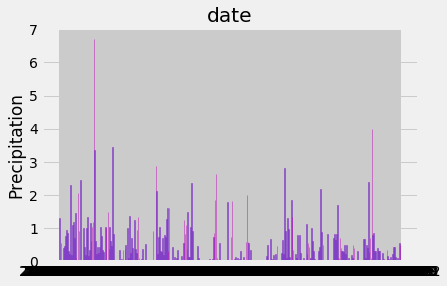

<Figure size 432x288 with 0 Axes>

In [53]:
# Use Pandas Plotting with Matplotlib to plot the data
x_axis= one_year_data['measurement_date']
y_axis=one_year_data['measurement_prcp']
ax= plt.bar(x_axis, y_axis, edgecolor="m", alpha=.9,align="center")
# Set a title for the chart
plt.title("date")
plt.ylabel("Precipitation")
plt.savefig("Hawaii precipitation.png")
plt.show()
plt.tight_layout()

In [54]:

# Design a query to calculate the total number of stations

for r in session.query(Station, Station.id, Station.station, Station.name).all():
    print(r)

(<sqlalchemy.ext.automap.station object at 0x0000025D1D987518>, 1, 'USC00519397', 'WAIKIKI 717.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D1D987160>, 2, 'USC00513117', 'KANEOHE 838.1, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D35C01198>, 3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D35C01EF0>, 4, 'USC00517948', 'PEARL CITY, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D34708B00>, 5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D34708D68>, 6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D34820128>, 7, 'USC00519281', 'WAIHEE 837.5, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D34820160>, 8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')
(<sqlalchemy.ext.automap.station object at 0x0000025D3712B710>, 9, 'USC00516128', 'MANOA LYON ARBO 785.2,

In [55]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).scalar() 

9

In [83]:
myquery3= session.query(Measurement, Measurement.id, Measurement.station)


In [79]:
# Save the query results as a Pandas DataFrame and set the index to the date column
ms_df = pd.DataFrame(myquery3, columns=['Measurement','id', 'station'])
ms_df.head()

,Measurement,station
id,,
1,<sqlalchemy.ext.automap.measurement object at ...,USC00519397
2,<sqlalchemy.ext.automap.measurement object at ...,USC00519397
3,<sqlalchemy.ext.automap.measurement object at ...,USC00519397
4,<sqlalchemy.ext.automap.measurement object at ...,USC00519397
5,<sqlalchemy.ext.automap.measurement object at ...,USC00519397


In [103]:
# What are the most active stations? (i.e. what stations have the most rows)?
session.query(func.count(Measurement.station))
#List the stations and observation counts in descending order.
most_active_station = ms_df.groupby(["station"]).count().sort_values(by="Measurement", ascending=False).reset_index()

most_active_station

,station,Measurement
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [149]:
#Which station has the highest number of observations?
print(f'{most_active_station.station[0]} has the highest number of observations')

USC00519281 has the highest number of observations


In [112]:
query4=session.query(Measurement, Measurement.station, Measurement.date, Measurement.tobs)
print(str(query4))

SELECT measurement.id AS measurement_id, measurement.station AS measurement_station, measurement.date AS measurement_date, measurement.prcp AS measurement_prcp, measurement.tobs AS measurement_tobs 
FROM measurement


In [138]:
# Save the query results as a Pandas DataFrame and set the index to the date column
temperature_df= pd.DataFrame(myquery4, columns=['measurement','station', 'date', 'temperature'])
temperature_df.reset_index(inplace=True)
temperature_df.head(10)

,index,measurement,station,date,temperature
0,0,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-01,65.0
1,1,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-02,63.0
2,2,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-03,74.0
3,3,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-04,76.0
4,4,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-06,73.0
5,5,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-07,70.0
6,6,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-08,64.0
7,7,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-09,68.0
8,8,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-10,73.0
9,9,<sqlalchemy.ext.automap.measurement object at ...,USC00519397,2010-01-11,64.0


In [153]:
# Select rows with station USC00519281, # and all columns between 'date' and 'temperature'
high_ob_station= temperature_df.loc[temperature_df["station"] == "USC00519281",:]
high_ob_station.tail()

,index,measurement,station,date,temperature
14954,14954,<sqlalchemy.ext.automap.measurement object at ...,USC00519281,2017-08-14,77.0
14955,14955,<sqlalchemy.ext.automap.measurement object at ...,USC00519281,2017-08-15,77.0
14956,14956,<sqlalchemy.ext.automap.measurement object at ...,USC00519281,2017-08-16,76.0
14957,14957,<sqlalchemy.ext.automap.measurement object at ...,USC00519281,2017-08-17,76.0
14958,14958,<sqlalchemy.ext.automap.measurement object at ...,USC00519281,2017-08-18,79.0


In [164]:
# Query the last 12 months of temperature observation data for the highest number of temperature observation counts
query5 = session.query(Measurement.station, Measurement.date, Measurement.tobs).group_by(Measurement.date).\
    filter(Measurement.date <= '2017-08-18').filter(Measurement.date >= '2016-08-17').\
    filter(Measurement.station=="USC00519281").all()

In [165]:
t_pd = pd.DataFrame(data=query5, columns=["station", "date", "temperature"])
t_pd = t_pd.set_index('date', drop=True)
t_pd = t_pd.drop(columns="station", axis=1)
t_pd.head()

,temperature
date,
2016-08-17,82.0
2016-08-18,80.0
2016-08-19,79.0
2016-08-20,81.0
2016-08-21,79.0


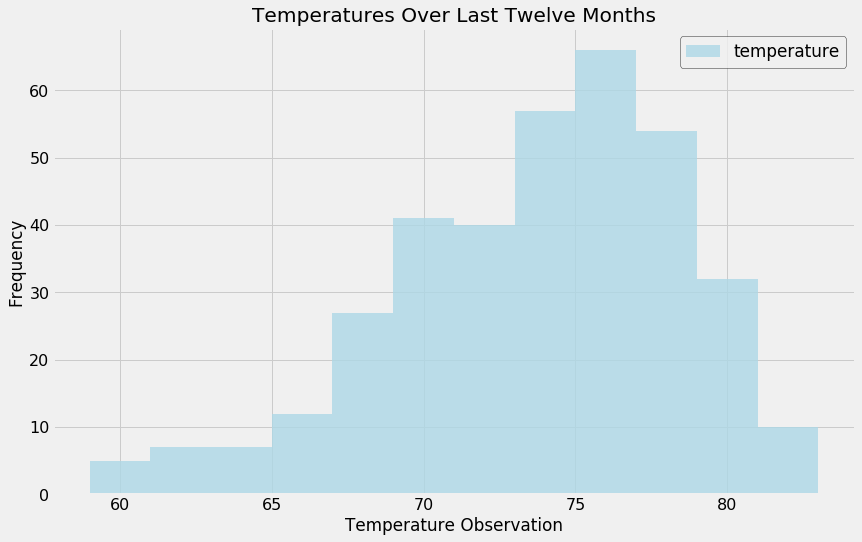

In [166]:

#Plotted the results as a histogram with bins=12
x = t_pd['temperature']
num_bins = 12
# the histogram of the data
plt.figure(figsize=[12.8, 8])
temp_plot = plt.hist(x, num_bins, facecolor='lightblue', label='temperature', alpha=0.8)

plt.xlabel('Temperature Observation')
plt.ylabel('Frequency')
plt.title('Temperatures Over Last Twelve Months')
plt.tick_params(axis='y', labelsize=16)
plt.tick_params(axis='x', labelsize=16)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')
plt.savefig("Hawaii temperatures.png")
plt.show()

In [167]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
highest_tem = t_pd["temperature"].max()
highest_tem

83.0

In [168]:
# highest temperature recorded, and average temperature most active station?
avg_tem = t_pd["temperature"].mean()
avg_tem

73.22067039106145

![precipitation](Images/station-histogram.png)

In [169]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


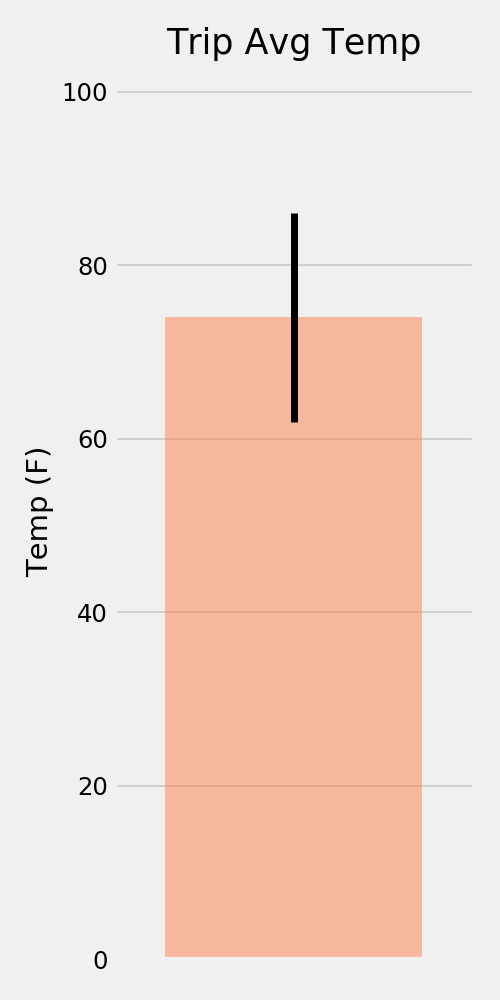

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


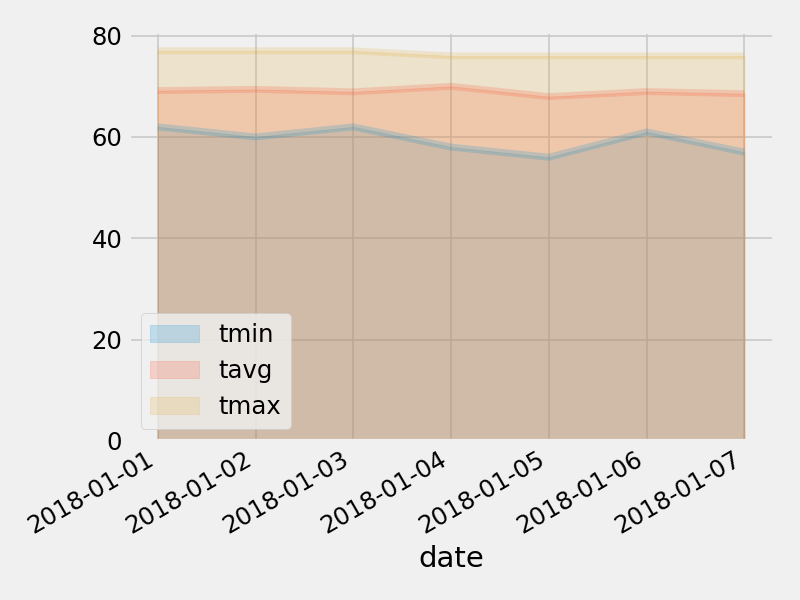

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
